## Trabalho Computacional
_Professor: Marcos Rogério Fernandes_

_Alunos: Eduardo Brioso (14607621), Heloísa Pazeti (14577991)_

Esse trabalho tem como objetivo representar a convolução de duas funções em gráficos animados. Alguns exemplos foram retirados de aulas da matéria de Sinais e Sistemas, enquanto outros foram escolhidos pelos estudantes.

Para a elaboração do projeto, nos baseamos em códigos de terceiros, fazendo as devidas adaptações para o contexto da disciplina. [Fontes](#Fontes)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import scipy.signal as sc
import utils
import IPython

plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = False

Definir a variável a ser usada (nesse caso, escolheu-se t)

In [2]:
t=sp.symbols('t', real=True)

Criar funções que serão usadas

In [3]:
def writeFunctions(h,g):
    utils.symdisp('h(t) = ', utils.round_expr(h,2))
    utils.symdisp('g(t) = ', utils.round_expr(g,2))
def plotConvolution(h, g, ti, tf, τ_max, figName):
    t=sp.symbols('t', real=True)
    delay = np.arange(-τ_max, τ_max, 0.01) 
    utils.genConvGIF(h, g, t, delay, ti, tf,\
            figName, xlabel= 'τ[s]', ylabel=['g(τ)', 'h(t-τ)','c(t)'],\
            fram=50, inter=150, plotConv=True)

### Exemplo 1 
(https://marofe.github.io/sinais-sistemas/2024/SEL0604/aula3.html, slide 50)

Definir as funções

In [4]:
h = sp.Piecewise((2, (t==2)), 
                 (t, (t>0)&(t<2)),
                 (0, (t!=2)|(t>2)|(t<0)))

g = sp.Piecewise((1, (t>-1)&(t<1)),                   
                 (0, (t<-1)|(t>1)))

writeFunctions(h,g)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Definir o intervalo de análise e visualizar as funções no intervalo

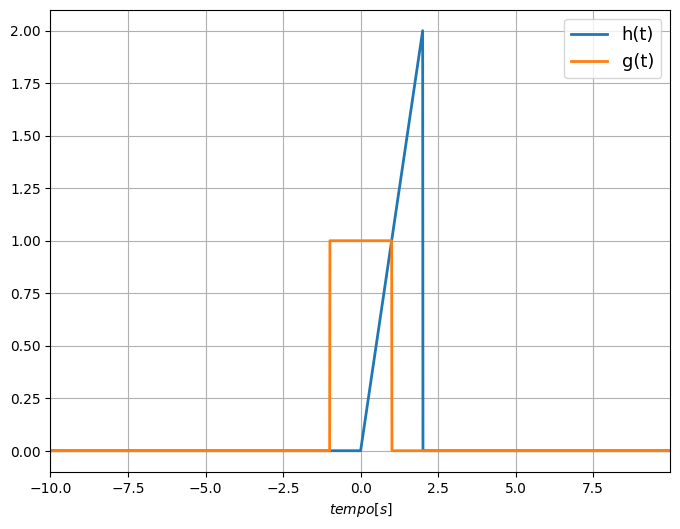

In [5]:
interval = np.arange(-10, 10, 0.01)
utils.symplot(t, [h, g], interval, ['h(t)','g(t)'])

Resultado da convolução: $c(t) = g(t)\ast h(t) =\int_{-\infty}^{\infty} g(\tau) h(t-\tau) d\tau$

In [6]:
figName  = 'convolutionFig1.gif'
plotConvolution(h=h, g=g, ti=-10, tf=10, τ_max=10, figName=figName)

MovieWriter imagemagick unavailable; using Pillow instead.


![MyGif](convolutionFig1.gif "segment")

### Exemplo 2
(https://marofe.github.io/sinais-sistemas/2024/SEL0604/aula3.html, slide 63)

Definir as funções

In [7]:
h = sp.Piecewise((0, t<0),
                 (sp.exp(-t), t>0))

g = sp.Piecewise((1, (t>-1)&(t<1)),                   
                 (0, (t<-1)|(t>1)))

writeFunctions(h,g)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Definir o intervalo de análise e visualizar as funções no intervalo

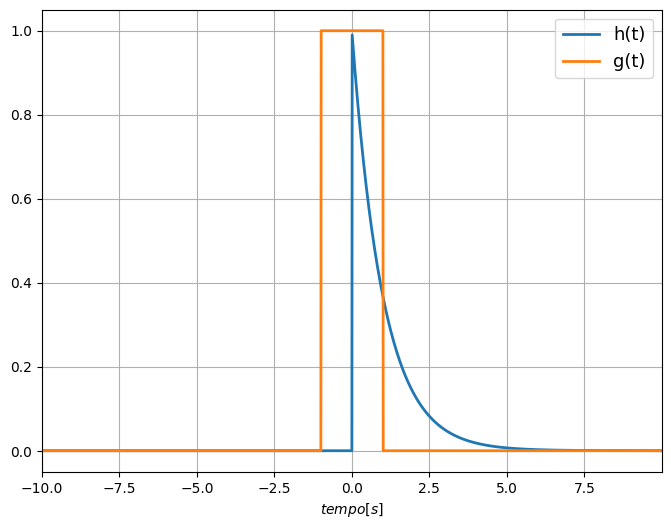

In [8]:
interval = np.arange(-10, 10, 0.01)
utils.symplot(t, [h, g], interval, ['h(t)','g(t)'])

Resultado da convolução: $c(t) = g(t)\ast h(t) =\int_{-\infty}^{\infty} g(\tau) h(t-\tau) d\tau$

In [9]:
figName  = 'convolutionFig2.gif'
plotConvolution(h=h, g=g, ti=-10, tf=10, τ_max=10, figName=figName)

MovieWriter imagemagick unavailable; using Pillow instead.


![MyGif](convolutionFig2.gif "segment")

### Exemplo 3
(https://marofe.github.io/sinais-sistemas/2024/SEL0604/aula3.html, slide 60)

Definir as funções

In [10]:
g = h = sp.Piecewise((1, (t>-1)&(t<1)),                   
                 (0, (t<-1)|(t>1)))

writeFunctions(h,g)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Definir o intervalo de análise e visualizar as funções no intervalo

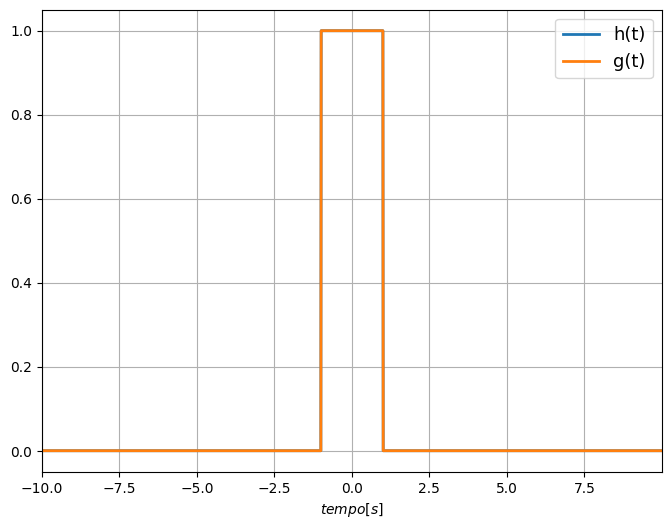

In [11]:
interval = np.arange(-10, 10, 0.01)
utils.symplot(t, [h, g], interval, ['h(t)','g(t)'])

Resultado da convolução: $c(t) = g(t)\ast h(t) =\int_{-\infty}^{\infty} g(\tau) h(t-\tau) d\tau$

In [12]:
figName  = 'convolutionFig3.gif'
plotConvolution(h=h, g=g, ti=-10, tf=10, τ_max=10, figName=figName)

MovieWriter imagemagick unavailable; using Pillow instead.


![MyGif](convolutionFig3.gif "segment")

### Exemplo 4

Definir as funções

In [13]:
h = sp.sin(t)

g = sp.cos(t)

writeFunctions(h,g)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Definir o intervalo de análise e visualizar as funções no intervalo

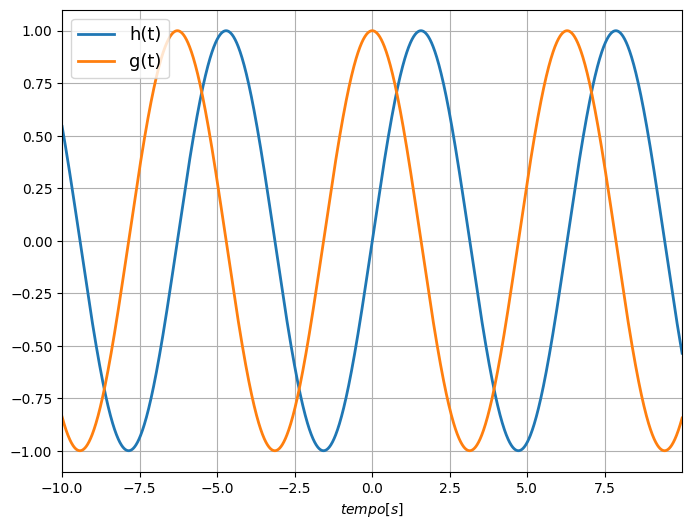

In [14]:
interval = np.arange(-10, 10, 0.01)
utils.symplot(t, [h, g], interval, ['h(t)','g(t)'])

Resultado da convolução: $c(t) = g(t)\ast h(t) =\int_{-\infty}^{\infty} g(\tau) h(t-\tau) d\tau$

In [15]:
figName  = 'convolutionFig4.gif'
plotConvolution(h=h, g=g, ti=-100, tf=100, τ_max=100, figName=figName)

MovieWriter imagemagick unavailable; using Pillow instead.


Para esse caso, escolhemos plotar em um intervalo maior a fim de observar o comportamento geral da convolução.

![MyGif](convolutionFig4.gif "segment")

### Exemplo 5

Como a função impulso não apresenta o comportamento de uma função tradicional, precisamos realizar a convolução de um modo distinto, partindo da sua definição. Por isso, este exemplo não possui uma animação da operação.

Escolhemos representar a convolução com a função impulso para mostrar sua propriedade característica.

Definir a função a ser convolucionada com a impulso

In [16]:
from sympy.abc import t, tau

g = sp.sin(t)
h = sp.DiracDelta(t)


Calcular o resultado da convolução a partir da integral

In [17]:
result = sp.integrate(g* h.subs(t, t-tau), (tau, -sp.oo, sp.oo))

utils.symdisp('c(t) = ', utils.round_expr(result,2))

<IPython.core.display.Math object>

Resultado da convolução: $c(t) = g(t)\ast h(t) =\int_{-\infty}^{\infty} g(\tau) h(t-\tau) d\tau$

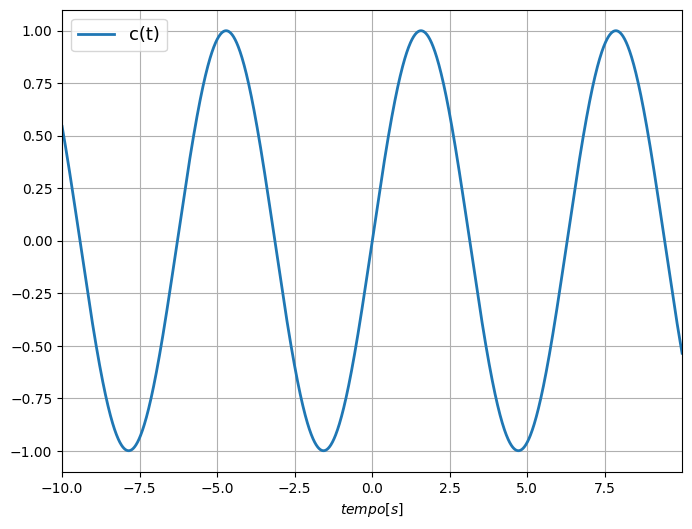

In [18]:
interval = np.arange(-10, 10, 0.01)
utils.symplot(t, result, interval, ['c(t)'])

### Fontes:
https://colab.research.google.com/github/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/Visualize%20convolution.ipynb
